In [ ]:
pip install tensorflow

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
Ai_brain = Sequential([
    # Hidden ReLU layers
                       Dense(units=5, activation='relu',input_shape=[3]),
                       Dense(units=3, activation='relu'),
                       Dense(units=4, activation='relu'),
    # Linear Output layer
                       Dense(units=1)
                      ])

In [ ]:
Ai_brain.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 5)                 20        
                                                                 
 dense_16 (Dense)            (None, 3)                 18        
                                                                 
 dense_17 (Dense)            (None, 4)                 16        
                                                                 
 dense_18 (Dense)            (None, 1)                 5         
                                                                 
Total params: 59 (236.00 Byte)
Trainable params: 59 (236.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [3]:
import pandas as pd


from sklearn.model_selection import train_test_split


from sklearn.preprocessing import MinMaxScaler


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd


auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)


worksheet = gc.open('regression_model').sheet1
data = worksheet.get_all_values()


df = pd.DataFrame(data[1:], columns=data[0])
df = df.astype({'input':'int'})
df = df.astype({'output':'int'})
df.head()

,input,output
0,1,11
1,2,21
2,3,31
3,4,41
4,5,51


In [5]:
X = df[['input']].values
y = df[['output']].values

In [6]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20]])

In [7]:
y

array([[ 11],
       [ 21],
       [ 31],
       [ 41],
       [ 51],
       [ 61],
       [ 71],
       [ 81],
       [ 91],
       [101],
       [111],
       [121],
       [131],
       [141],
       [151],
       [161],
       [171],
       [181],
       [191],
       [201]])

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state = 30)

In [9]:
Scaler = MinMaxScaler()

In [10]:
Scaler.fit(X_train)

MinMaxScaler()

In [33]:
X_train1 = Scaler.transform(X_train)

In [51]:
Ai_brain = Sequential([
    # Hidden ReLU layers
                       Dense(units=5, activation='relu',input_shape=[1]),
                       Dense(units=3, activation='relu'),
    # Linear Output layer
                       Dense(units=1)
                      ])

In [52]:
Ai_brain.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 5)                 10        
                                                                 
 dense_5 (Dense)             (None, 3)                 18        
                                                                 
 dense_6 (Dense)             (None, 1)                 4         
                                                                 
Total params: 32 (128.00 Byte)
Trainable params: 32 (128.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
Ai_brain.compile(optimizer='rmsprop',loss='mse')

In [65]:
Ai_brain.fit(X_train1,y_train,epochs=5000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 11ms/step - loss: 0.0027
Epoch 2283/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0027
Epoch 2284/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.0027
Epoch 2285/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.0027
Epoch 2286/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0027
Epoch 2287/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0027
Epoch 2288/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0027
Epoch 2289/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 2290/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0027
Epoch 2291/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0027
Epoch 2292/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.0027
Epoch 2293/5000
1/1 [==============================] - 0s 9m

In [66]:
loss_df = pd.DataFrame(Ai_brain.history.history)

<Axes: >

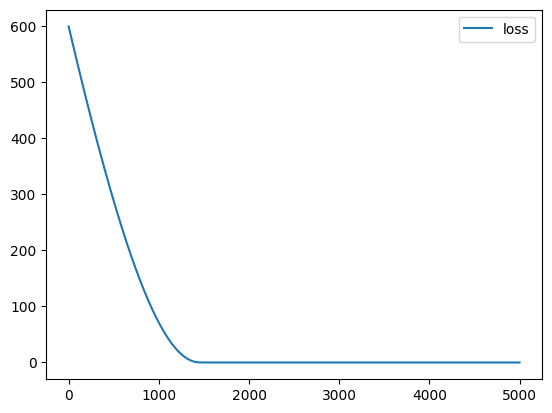

In [67]:
loss_df.plot()

In [68]:
X_test1 = Scaler.transform(X_test)

In [69]:
Ai_brain.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 20ms/step - loss: 0.0043


0.004252946004271507

In [79]:
X_n1 = [[10]]

In [80]:
X_n1_1 = Scaler.transform(X_n1)

In [81]:
Ai_brain.predict(X_n1_1)

1/1 [==============================] - 0s 21ms/step


array([[100.94794]], dtype=float32)

In [82]:
df

,input,output
0,1,11
1,2,21
2,3,31
3,4,41
4,5,51
5,6,61
6,7,71
7,8,81
8,9,91
9,10,101
